## Introduction to Python - Session 2

### Topics for Today

**- Review**

**- Importing libraries**

**- Analyzing and Visualizing data**

**- Creating functions**

**- Errors**

Download this Jupyter Notebook: 

Download workshop data: https://swcarpentry.github.io/python-novice-inflammation/data/python-novice-inflammation-data.zip. Unzip the file and open a new Jupyter Notebook in the same directory as the data folder.

Workshop Documentation: https://swcarpentry.github.io/python-novice-inflammation/aio.html

For questions or more information, please contact: kdurante@stanford.edu

## Review

### Lists

Create a variable called **odds** and populate it with odd numbers from 1-9.

```odds = [1,3,5,7,9]```

### Indexing

Get the first item from the list</br>

```odds[0]```

Get the last item from the list</br>

```odds[-1]```

### Slicing

Slicing alows us to segement data using indicies.

Get items 2-4 from the list:</br>

```odds[1:4]``` Take item at index position 1 and take all entries up to (but not including) position 4. 

Get the first 3 items from the list:</br>

```odds[0:3]``` Take item at index position 0 and take all entries up to (but not including) position 3.

If the first index is empty, the slice starts at the beginning (0).

```odds[:3]```

If the last index is empty, the slice continues to the end (-1).

```odds[2:]```

### For loops

Loop over the list and print out an item entry on a new line.

```for num in odds:```</br>
```    print (num)```

### If/Elif/Else

```for num in odds:```</br>
```    if num == 1:```</br>
```        print (num,  ' is 1')```</br>
```    elif num < 9:```</br>
```        print (num, ' is less than 9')```</br>
```    else:```</br>
```        print (num, ' is 9')```</br>

### Exercises

1. Create a list called **animals** and populate it with 4 items: dogs, cats, frogs, birds

2. Use indexing to output frogs

3. Use slicing to output only dogs and cats

4. Create a loop to output each animal to a separate line.

## Python Libraries

Python libraries are a set of useful functions that eliminate the need for writing code from scratch. They contain reusable functions or classes that can be called upon as needed.

Libraries are invoked in Python using the **import** command. Let's get the current day and time using the time library.

```import time```</br>
```current_time = time.ctime()```</br>
```current_time```

Note that in **time.ctime**, **ctime** is a function of time which is called using dot notation. 

Lets get the time zone:

```print(time.tzname)```</br>
```tz = time.tzname```</br>
```tz[0]```</br>

Next, we'll look at analyzing, inspecting, and plotting data using [NumPy](https://numpy.org/doc/stable/index.html) and [Matplotlib](https://matplotlib.org/) libraries. 

NumPy - Numerical Python is a library used for working with arrays.

Matpoltlib -Matplotlib is a comprehensive Python library for creating static, animated, and interactive visualizations.

NumPy and Matplotlib are commonly imported using the shortcuts shown below:

```import numpy as np```</br>
```import matplotlib.pyplot as plt```

### Loading data with NumPy (Arrays)

An array is a central data structure of the NumPy library. An array is a grid of values and it contains information about the raw data, how to locate an element, and how to interpret an element.

Let's look at some data from our sample datasets. There are 12 CSV files all beginning with 'inflammation' which contain data from clinical trials conducted on 60 patients over a 40-day period.

Create a NumPy array from a CSV file using the **loadtxt** function. This function can take several parameters, **fname** is required, we will also supply the parameter **delimiter** to specify that we are using a comma delimited file. If the first row of the CSV data contains headers, use the parameter **skiprows**.

```np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')```

Create a variable called **data** to store the array

### Inspecting and Analyzing Data

```print(type(data))``` - Displays the object type

```print (data.dtype)``` - Displays the data type

```print(data.shape)``` - Displays the extent of the array in rows and columns

Selecting a single element in a 2-dimensional array by supplying the row and column:

```data[30,20]``` Selects element at row 21, column 31

Select a single row:

``` data[4]``` Selects all of row 5

Select a single column:

```data[:, 2:3])``` Selects all of column 3

Select the first value in the array

```print ('first value:', data[0, 0])```

Select the last value in the array

```print ('last value:', data[59,39])```

Compute the mean value

np.mean(data)

Find the maximum, minimum, and standard deviation values

```maxval, minval, stdval = np.amax(data), np.amin(data), np.std(data)```

```maxval, minval, stdval```



## Plotting Data

Plotting with Matplotlib to visualize the data. 

Create an image from the data.

```plt.imshow(data)```</br>
```plt.show()```

In [613]:
#%matplotlib inline

**Note**: if an image does not display, you may need to run the command **%matplotlib inline** before executing the code.

Each row in the heat map corresponds 1 of 60 patients in the clinical trial dataset, and each column corresponds to a day in the dataset. Blue pixels in this heat map represent low values, while yellow pixels represent high values. As we can see, the general number of inflammation flare-ups for the patients rises and falls over a 40-day period.


In a 2-dimensional NumPy array, the axes are the directions along the rows and columns. Axis 0 runs vertically down the rows and axis 1 runs horizontally across the columns.

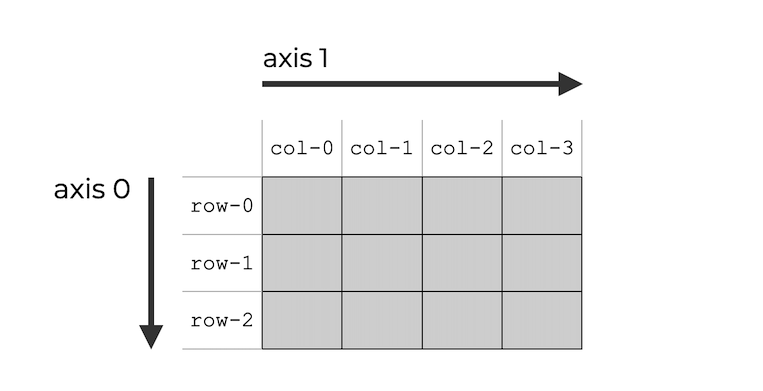

Plotting average inflammation over 40 days

```ave_inflammation = np.mean(data, axis=0)```</br>
```ave_plot = plt.plot(ave_inflammation)```</br>
```plt.show()```

Plot maximum inflammation over time

```max_plot = plt.plot(np.amax(data, axis=0))```</br>
```plt.show()```

Plot minimum inflammation over time

```min_plot = plt.plot(np.amin(data, axis=0))```</br>
```plt.show()```

### Grouping Plots

Grouping similar plots in a single figure using subplots. 

The Matplotlib **figure** function creates a space in which we can place all of our plots. The parameter **figsize** tells Python how big to make this space. Each subplot is placed into the figure using its **add_subplot** method. The **add_subplot** method takes 3 parameters. The first denotes how many total rows of subplots there are, the second parameter refers to the total number of subplot columns, and the final parameter denotes which subplot your variable is referencing (left-to-right, top-to-bottom). Each subplot is stored in a different variable (axes1, axes2, axes3). Once a subplot is created, the axes can be titled using the **set_xlabel()** command (or **set_ylabel()**). If we leave out that call to **fig.tight_layout()**, the graphs will actually be squeezed together more closely. **plt.savefig** will save an image of our figure.

Here are our three plots side by side:

```data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')```</br>
```fig = plt.figure(figsize=(10.0, 3.0))```

```axes1 = fig.add_subplot(1, 3, 1)```</br>
```axes2 = fig.add_subplot(1, 3, 2)```</br>
```axes3 = fig.add_subplot(1, 3, 3)```</br>

```axes1.set_ylabel('average')```</br>
```axes1.plot(np.mean(data, axis=0))```

```axes2.set_ylabel('max')```</br>
```axes2.plot(np.amax(data, axis=0))```

```axes3.set_ylabel('min')```</br>
```axes3.plot(np.amin(data, axis=0))```

```fig.tight_layout()```</br>
```plt.savefig('data/inflammation.png')```</br>
```plt.show()```

### Analyzing and Plotting Data from Multiple Files

Performing the same action on multiple files.

The **glob** library contains a function, also called glob, that finds files and directories whose names match a pattern. We provide those patterns as strings: the character * matches zero or more characters, while ? matches any one character. We can use this to get the names of all the CSV files in the current directory:

```import glob```</br>
```filenames = sorted(glob.glob('data/inflammation*.csv'))```</br>
```filenames = filenames[0:3]```

Use the **sorted** function to sort the files

### Plotting Data from Multiple Files

Now that we have a list of files to work with, let's plot the data using a for loop:

```filenames = sorted(glob.glob('data/inflammation*.csv'))```</br>
```filenames = filenames```</br>
```for filename in filenames:```</br>
    ```   print(filename)```
    
```   data = np.loadtxt(fname=filename, delimiter=',')```</br>
```   fig = plt.figure(figsize=(10.0, 3.0))```</br>
```   axes1 = fig.add_subplot(1, 3, 1)```</br>
```   axes2 = fig.add_subplot(1, 3, 2)```</br>
```   axes3 = fig.add_subplot(1, 3, 3)```</br>
```   axes1.set_ylabel('mean')```</br>
```   axes1.plot(np.mean(data, axis=0))```</br>
```   axes2.set_ylabel('max')```</br>
```   axes2.plot(np.amax(data, axis=0))```</br>
```   axes3.set_ylabel('min')```</br>
```   axes3.plot(np.amin(data, axis=0))```</br>
```   fig.tight_layout()```</br>
```   plt.show()```

In the plot outputs above, notice some of the max and min values look somewhat peculiar. Some max values show a sharp increase and decrease, and some min values show a straight line. Let's look at how to design some code (in the form of functions) to highlight these inconsistencies.

### Creating functions

Functions are a way to package code so that it is easier to reuse, a shorthand way of re-executing longer pieces of code. Functions begin with ```def``` followed by an indented block of code which is performed on inputs.

Let's create a function to print out filenames from our data directory:

```filenames = sorted(glob.glob('data/inflammation*.csv'))```

```def print_filenames(f):```</br>
```    print (f)```
    
```for f in filenames:```</br>
```    print_filenames(f)```

Create a function to loop through our **odds** list and add 1 to each number:

```def add_numbers(i):```</br>
```    i = i + 1```</br>
```    print (i)```</br>

```for i in odds:```</br>
```    add_numbers(i)```

Create a function to plot the data

```def visualize(filename):```

```   data = np.loadtxt(fname=filename, delimiter=',')```</br>
```   fig = plt.figure(figsize=(10.0, 3.0))```</br>
```   axes1 = fig.add_subplot(1, 3, 1)```</br>
```   axes2 = fig.add_subplot(1, 3, 2)```</br>
```   axes3 = fig.add_subplot(1, 3, 3)```</br>
```   axes1.set_ylabel('mean')```</br>
```   axes1.plot(np.mean(data, axis=0))```</br>
```   axes2.set_ylabel('max')```</br>
```   axes2.plot(np.amax(data, axis=0))```</br>
```   axes3.set_ylabel('min')```</br>
```   axes3.plot(np.amin(data, axis=0))```</br>
```   fig.tight_layout()```</br>
```   plt.show()```

Create a function to detect problems

```def detect_problems(filename):```</br>

```    data = np.loadtxt(fname=filename, delimiter=',')```</br>

```    if np.amax(data, axis=0)[0] == 0 and np.amax(data, axis=0)[20] == 20:```</br>
```        print('Suspicious looking maxima!')```</br>
```    elif np.sum(np.amin(data, axis=0)) == 0:```</br>
```        print('Minima add up to zero!')```</br>
```    else:```</br>
```        print('Seems OK!')```

Loop over a list of filenames, plot values, and check for problems

```filenames = sorted(glob.glob('data/inflammation*.csv'))```</br>

```for filename in filenames[:3]:```</br>
```    print(filename)```</br>
```    visualize(filename)```</br>
```    detect_problems(filename)```</br>
```    print ('-----')```

## Working with Images


The [Scikit-image](https://scikit-image.org/) library is a collection of algorithms for image processing. It contains utilities to read and write images in various formats.

The [Requests](https://pypi.org/project/requests/) library allows you to work with HTTP requests quickly and easily.

Let's grab an image from a specified url and open it with Matplotlib:



```import requests```</br>
```from skimage.io import imread```</br>

```url = 'https://pubs.usgs.gov/mf/2002/2393/MonoBathy.jpg'```</br>
```res = requests.get(url)```</br>
```image = imread(url)```</br>
```plt.imshow(image)```</br>

Let's look at the type of data

```type(image)```

Look at the array

```image```

Let's examine a part of the image using slicing

```plt.imshow(image[0:200,0:-200])```

To disable axes and save the image:

```plt.imshow(image[0:200,0:-200])```</br>
```plt.axis('off')```</br>
```plt.savefig('data/mono_slice.png')```

### Display current variables

Use the following command to display a list of current variables

```%whos```

### Errors and Exceptions

Some common errors

Run the code snippets below

In [616]:
odds = [1,3,5,7,9]
odds[5]

In [605]:
print('Trying to learn Python)

### Useful Libraries to Explore

[Seaborn](https://seaborn.pydata.org/)

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


[Pandas - Python Data Analysis Library](https://pandas.pydata.org/)

Pandas is a library built on top of Python specifically for data manipulation and analysis, Pandas offers data structure and operations for powerful, flexible, and easy-to-use data analysis and manipulation.

[GeoPandas](https://geopandas.org/en/stable/getting_started/install.html) and [GDAL](https://gdal.org/user/gdal_python_utilities.html)

These are libraries used for analyzing, manipulating, and converting geospatial data.

[OpenAI](https://platform.openai.com/docs/api-reference?lang=python)

The OpenAI Python library provides convenient access to the OpenAI REST API from any Python 3.7+ application. The library includes type definitions for all request params and response fields, and offers both synchronous and asynchronous clients powered by httpx.






